## Series
Структура/объект **Series** представляет из себя объект, похожий на одномерный массив (питоновский список, например), но отличительной его чертой является наличие ассоциированных меток, т.н. индексов, вдоль каждого элемента из списка. Такая особенность превращает его в ассоциативный массив или словарь в Python.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
series = pd.Series([5, 6, 7, 8, 9, 10])
print(series)

0     5
1     6
2     7
3     8
4     9
5    10
dtype: int64


Объект Series создаётся из словаря:

In [3]:
series_from_dict = pd.Series({'a': 5, 'b': 6, 'c': 7, 'd': 8})
print(series_from_dict)

a    5
b    6
c    7
d    8
dtype: int64


У объекта Series есть атрибуты через которые можно получить список элементов и индексы, это values и index соответственно.

In [4]:
print(f"Индексы: {series.index}")
print(f"Список элементов: {series.values}")

Индексы: RangeIndex(start=0, stop=6, step=1)
Список элементов: [ 5  6  7  8  9 10]


Доступ к элементам объекта Series возможны по их индексу (вспоминается аналогия со словарем и доступом по ключу).

In [5]:
series[4]

9

Индексы можно задавать явно:

In [6]:
index_series = pd.Series([5, 6, 7, 8, 9, 10], index=['a', 'b', 'c', 'd', 'e', 'f'])
print(index_series['f'])

10


Можно делать выборку по нескольким индексам:

In [7]:
print(index_series[['a', 'b', 'f']])

a     5
b     6
f    10
dtype: int64


 Осуществлять групповое присваивание:

In [8]:
index_series[['a', 'b', 'f']] = 0
print(index_series)

a    0
b    0
c    7
d    8
e    9
f    0
dtype: int64


Фильтровать Series, а также применять математические операции:

In [9]:
print(index_series[index_series == 0])
print(index_series[index_series > 0] * 2)

a    0
b    0
f    0
dtype: int64
c    14
d    16
e    18
dtype: int64


У объекта Series и его индекса есть атрибут name, задающий имя объекту и индексу соответственно:

In [10]:
index_series.name = 'numbers'
index_series.index.name = 'letters'
print(index_series)

letters
a    0
b    0
c    7
d    8
e    9
f    0
Name: numbers, dtype: int64


Индекс можно поменять "на лету", присвоив список атрибуту index объекта Series:

In [11]:
index_series.index = ['A', 'B', 'C', 'D', 'E', 'F']
print(index_series)

A    0
B    0
C    7
D    8
E    9
F    0
Name: numbers, dtype: int64


Имейте в виду, что список с индексами по длине должен совпадать с количеством элементов в Series.

## DataFrame

Объект DataFrame лучше всего представлять себе в виде обычной таблицы, ведь DataFrame является табличной структурой данных. В любой таблице всегда присутствуют строки и столбцы. Столбцами в объекте DataFrame выступают объекты Series, строки которых являются их непосредственными элементами.

DataFrame проще всего сконструировать из словаря:

In [12]:
df = pd.DataFrame({
    'country': ['Kazakhstan', 'Russia', 'Belarus', 'Ukraine'],
    'population': [17.04, 143.5, 9.5, 45.5],
    'square': [2724902, 17125191, 207600, 603628]
    })
print(df)

      country  population    square
0  Kazakhstan       17.04   2724902
1      Russia      143.50  17125191
2     Belarus        9.50    207600
3     Ukraine       45.50    603628


Jupyter поддерживает "красивое" отображение DataFrame'ов:

In [13]:
df

,country,population,square
0,Kazakhstan,17.04,2724902
1,Russia,143.50,17125191
2,Belarus,9.50,207600
3,Ukraine,45.50,603628


Чтобы убедиться, что столбец в DataFrame это Series, извлекаем любой:

In [14]:
df['country']

0    Kazakhstan
1        Russia
2       Belarus
3       Ukraine
Name: country, dtype: object

In [15]:
type(df['country'])

pandas.core.series.Series

Объект DataFrame имеет 2 индекса: по строкам и по столбцам. Индекс по строкам можно задать разными способами, например, при формировании самого объекта DataFrame или "на лету", по аналогии с Series:

In [16]:
df = pd.DataFrame({
    'country': ['Kazakhstan', 'Russia', 'Belarus', 'Ukraine'],
    'population': [17.04, 143.5, 9.5, 45.5],
    'square': [2724902, 17125191, 207600, 603628]
    }, index=['KZ', 'RU', 'BY', 'UA'])
df

,country,population,square
KZ,Kazakhstan,17.04,2724902
RU,Russia,143.50,17125191
BY,Belarus,9.50,207600
UA,Ukraine,45.50,603628


In [17]:
df.index = ['kz', 'ru', 'by', 'ua']
df.index.name = 'Country Code'
df

,country,population,square
Country Code,,,
kz,Kazakhstan,17.04,2724902
ru,Russia,143.50,17125191
by,Belarus,9.50,207600
ua,Ukraine,45.50,603628


Доступ к строкам по индексу возможен несколькими способами:
* .loc - используется для доступа по строковой метке
* .iloc - используется для доступа по числовому значению (начиная от 0)

In [18]:
df.loc['kz']

country       Kazakhstan
population         17.04
square           2724902
Name: kz, dtype: object

In [19]:
df.iloc[0]

country       Kazakhstan
population         17.04
square           2724902
Name: kz, dtype: object

Можно делать выборку по индексу и интересующим колонкам:

In [20]:
df.loc[['kz', 'ru'], 'population']

Country Code
kz     17.04
ru    143.50
Name: population, dtype: float64

Как можно заметить, .loc в квадратных скобках принимает 2 аргумента: интересующий индекс колонки. При этом поддерживается срез:

In [21]:
df.loc['kz':'by', :]

,country,population,square
Country Code,,,
kz,Kazakhstan,17.04,2724902
ru,Russia,143.50,17125191
by,Belarus,9.50,207600


Фильтровать DataFrame можно с помощью т.н. булевых массивов (по аналогии с Series):

In [22]:
 df[df.population > 10]

,country,population,square
Country Code,,,
kz,Kazakhstan,17.04,2724902
ru,Russia,143.50,17125191
ua,Ukraine,45.50,603628


Pandas при операциях над DataFrame, возвращает новый объект DataFrame.

Добавим новый столбец, в котором население (в миллионах) поделим на площадь страны, получив тем самым плотность:

In [23]:
df['density'] = df['population'] / df['square'] * 1000000
df

,country,population,square,density
Country Code,,,,
kz,Kazakhstan,17.04,2724902,6.253436
ru,Russia,143.50,17125191,8.379469
by,Belarus,9.50,207600,45.761079
ua,Ukraine,45.50,603628,75.377550


Не нравится новый столбец? Не проблема, удалим его:

In [24]:
df.drop(['density'], axis='columns')

,country,population,square
Country Code,,,
kz,Kazakhstan,17.04,2724902
ru,Russia,143.50,17125191
by,Belarus,9.50,207600
ua,Ukraine,45.50,603628


In [25]:
dir(df)

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_e

## Чтение и запись данных

pandas поддерживает все самые популярные форматы хранения данных: csv, excel, sql, буфер обмена, html и многое другое. Чаще всего приходится работать с csv-файлами. Например, чтобы сохранить наш DataFrame со странами, достаточно написать:

In [26]:
df.to_csv('countries.csv')

Считать данные из csv-файла и превратить в DataFrame можно функцией read_csv:

In [27]:
df = pd.read_csv('countries.csv', sep=',')

Аргумент sep указывает на разделитель столбцов.

## Группировка и агрегирование в pandas

Группировка данных один из самых часто используемых методов при анализе данных. В pandas за группировку отвечает метод groupby.

Проанализируем данные о коронавирусе covid_19_data.csv

In [28]:
df = pd.read_csv('covid_19_data.csv')

Чтобы посмотреть первые 5 записей считанного файла, воспользуемся методом head:

In [29]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


Чтобы посмотреть последние 5 записей считанного файла, воспользуемся методом tail:

In [30]:
df.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
18960,18961,04/26/2020,Wyoming,US,2020-04-27 02:31:20,502.0,7.0,0.0
18961,18962,04/26/2020,Xinjiang,Mainland China,2020-04-27 02:31:20,76.0,3.0,73.0
18962,18963,04/26/2020,Yukon,Canada,2020-04-27 02:31:20,11.0,0.0,0.0
18963,18964,04/26/2020,Yunnan,Mainland China,2020-04-27 02:31:20,185.0,2.0,181.0
18964,18965,04/26/2020,Zhejiang,Mainland China,2020-04-27 02:31:20,1268.0,1.0,1258.0


Посмотрим общую информацию о полученных данных:

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18965 entries, 0 to 18964
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              18965 non-null  int64  
 1   ObservationDate  18965 non-null  object 
 2   Province/State   9326 non-null   object 
 3   Country/Region   18965 non-null  object 
 4   Last Update      18965 non-null  object 
 5   Confirmed        18965 non-null  float64
 6   Deaths           18965 non-null  float64
 7   Recovered        18965 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 1.2+ MB


Рассчитаем метрики по числовым колонкам с помощью метода describe:

In [32]:
df.describe()

,SNo,Confirmed,Deaths,Recovered
count,18965.000000,18965.000000,18965.000000,18965.000000
mean,9483.000000,3237.481571,196.188347,827.524703
std,5474.868263,15904.297951,1447.754795,5995.640387
min,1.000000,0.000000,0.000000,0.000000
25%,4742.000000,10.000000,0.000000,0.000000
50%,9483.000000,107.000000,1.000000,2.000000
75%,14224.000000,712.000000,9.000000,75.000000
max,18965.000000,288045.000000,26644.000000,117727.000000


Преобразуем данные Last Update в datetime

In [33]:
df['Last Update'] = pd.to_datetime(df['Last Update'])
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
18960,18961,04/26/2020,Wyoming,US,2020-04-27 02:31:20,502.0,7.0,0.0
18961,18962,04/26/2020,Xinjiang,Mainland China,2020-04-27 02:31:20,76.0,3.0,73.0
18962,18963,04/26/2020,Yukon,Canada,2020-04-27 02:31:20,11.0,0.0,0.0
18963,18964,04/26/2020,Yunnan,Mainland China,2020-04-27 02:31:20,185.0,2.0,181.0


Добавляем колонки Day, Month и Hour

In [34]:
df['Day'] = df['Last Update'].apply(lambda x:x.day)
df['Month'] = df['Last Update'].apply(lambda x:x.month)
df['Hour'] = df['Last Update'].apply(lambda x:x.hour)
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Day,Month,Hour
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0,22,1,17
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0,22,1,17
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0,22,1,17
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0,22,1,17
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0,22,1,17
...,...,...,...,...,...,...,...,...,...,...,...
18960,18961,04/26/2020,Wyoming,US,2020-04-27 02:31:20,502.0,7.0,0.0,27,4,2
18961,18962,04/26/2020,Xinjiang,Mainland China,2020-04-27 02:31:20,76.0,3.0,73.0,27,4,2
18962,18963,04/26/2020,Yukon,Canada,2020-04-27 02:31:20,11.0,0.0,0.0,27,4,2
18963,18964,04/26/2020,Yunnan,Mainland China,2020-04-27 02:31:20,185.0,2.0,181.0,27,4,2


Создадим набор с данными только за январь

In [35]:
jan_data = df[df['Month'] == 1]
jan_data

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Day,Month,Hour
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0,22,1,17
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0,22,1,17
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0,22,1,17
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0,22,1,17
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0,22,1,17
...,...,...,...,...,...,...,...,...,...,...,...
1186,1187,02/10/2020,NaN,Nepal,2020-01-31 08:15:53,1.0,0.0,0.0,31,1,8
1248,1249,02/11/2020,NaN,Russia,2020-01-31 16:13:45,2.0,0.0,0.0,31,1,16
1254,1255,02/11/2020,NaN,Cambodia,2020-01-31 08:15:53,1.0,0.0,0.0,31,1,8
1256,1257,02/11/2020,NaN,Finland,2020-01-31 08:15:53,1.0,0.0,0.0,31,1,8


In [36]:
print('Подтвержденные случаи (весь мир): ', int(jan_data['Confirmed'].sum()))
print('Смерти (весь мир): ', int(jan_data['Deaths'].sum()))
print('Выздоровления (весь мир): ', int(jan_data['Recovered'].sum()))

Подтвержденные случаи (весь мир):  38761
Смерти (весь мир):  889
Выздоровления (весь мир):  861


Посмотрим как коронавирус распространялся в течение января

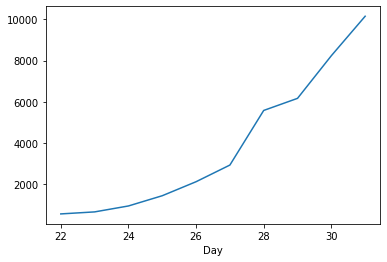

In [37]:
jan_data.groupby('Day').sum()['Confirmed'].plot();

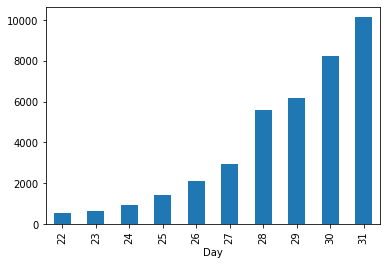

In [38]:
jan_data.groupby('Day').sum()['Confirmed'].plot(kind='bar');

Виден экспоненциальный рост.
посмотрим, как вирус распространялся по странам в течение января:

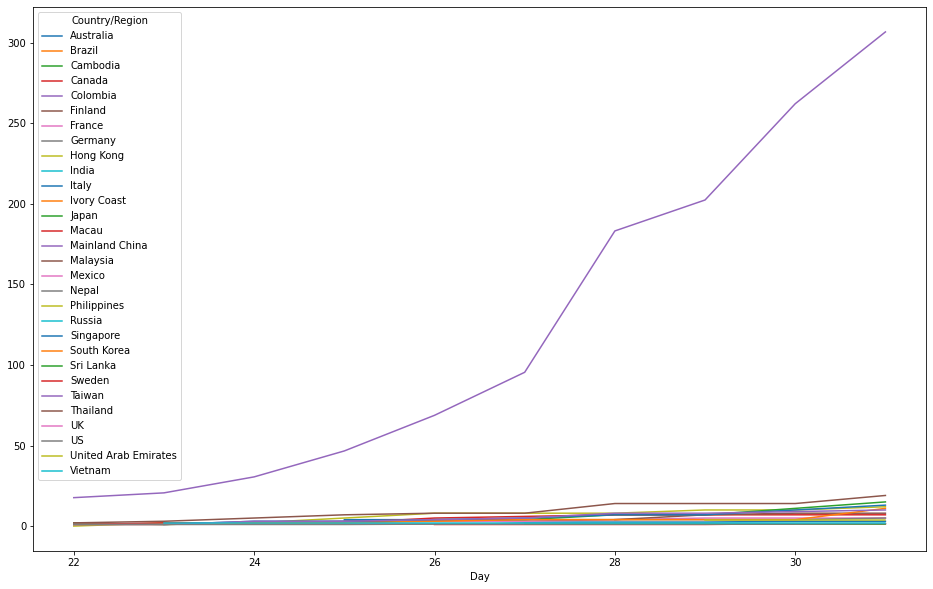

In [39]:
pivoted = pd.pivot_table(jan_data, values='Confirmed', columns='Country/Region', index='Day')
pivoted.plot(figsize=(16,10));

Видно, что вспышка заболевания началась в Китае. Давайте посмотрим те же данные за апрель.

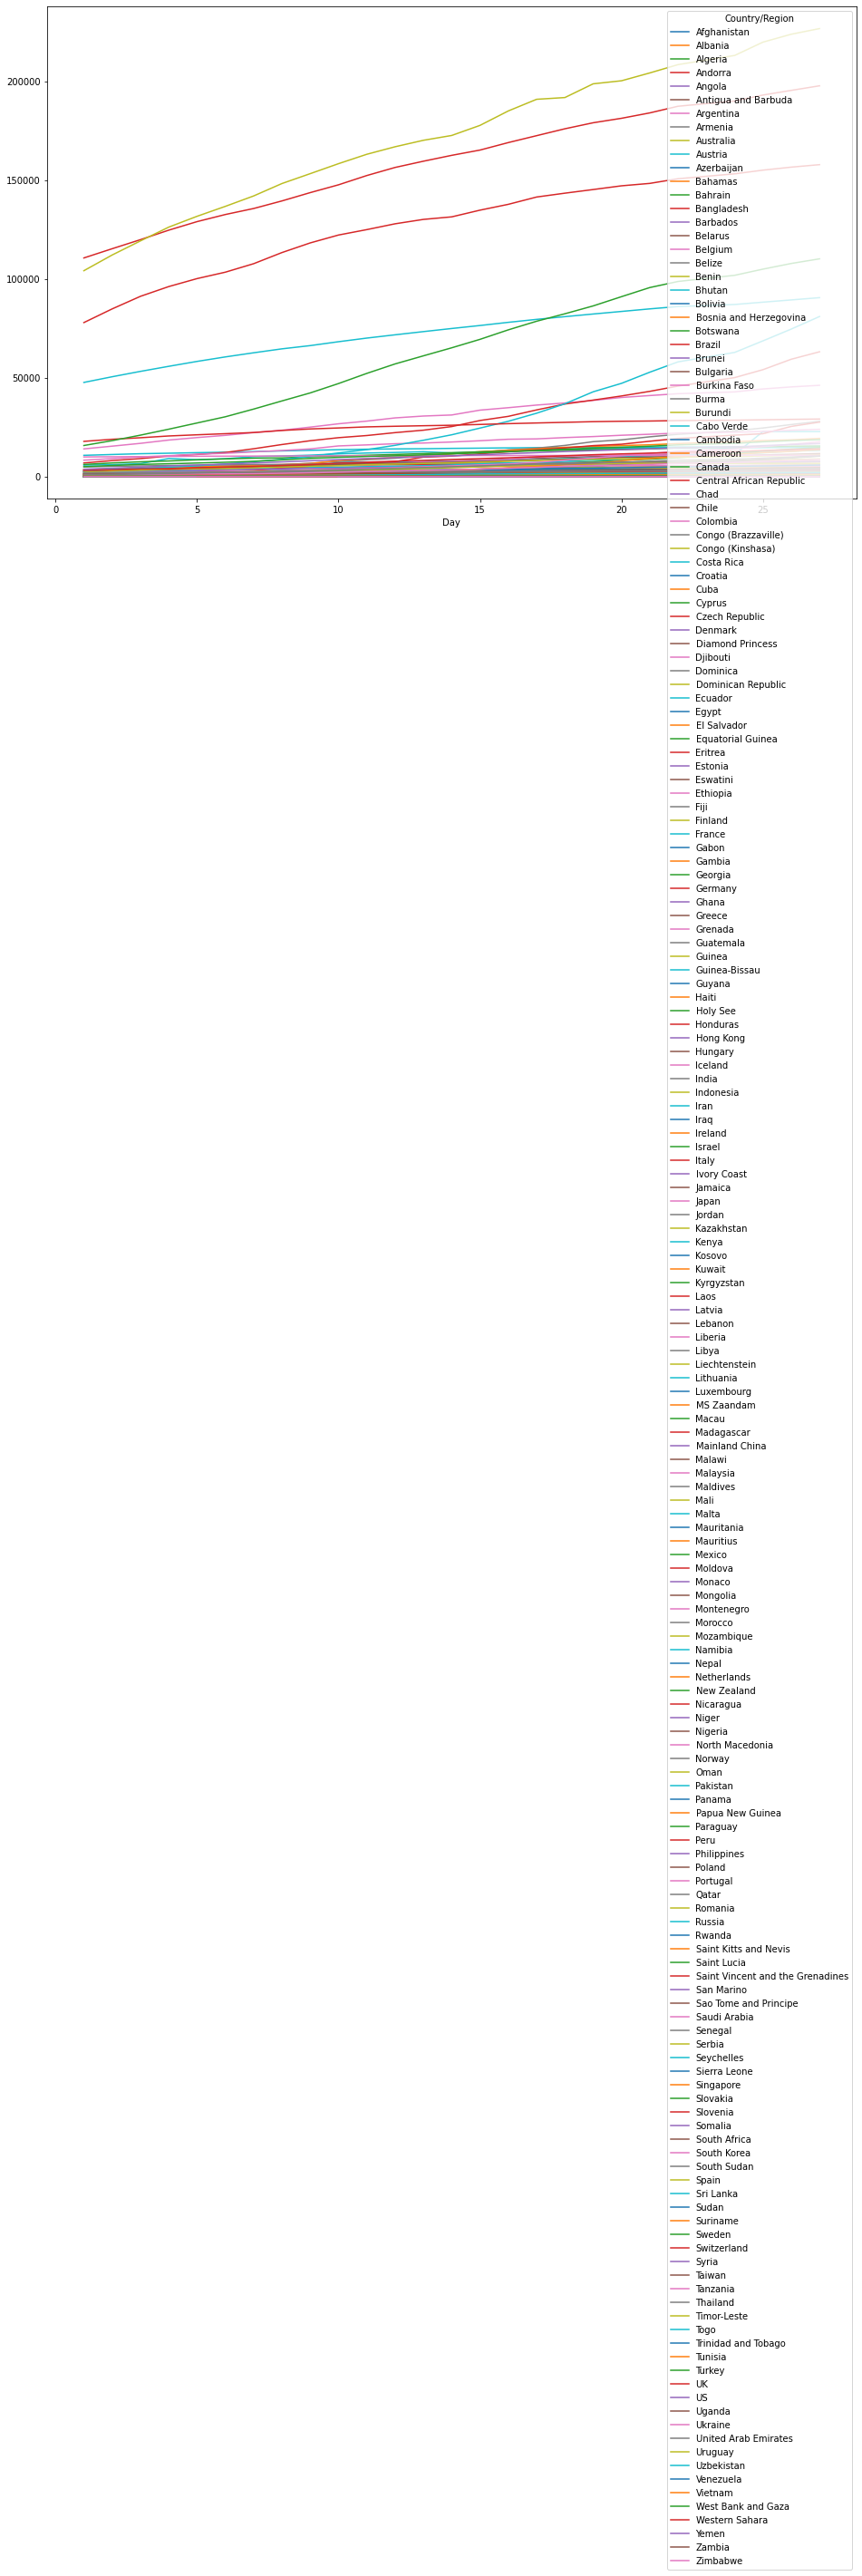

In [40]:
apr_data = df[df['Month'] == 4]
pivoted = pd.pivot_table(apr_data, values='Confirmed', columns='Country/Region', index='Day')
pivoted.plot(figsize=(16,10));

Лидируют Испания и Италия

Рассмотрим только Россию:

In [41]:
rus_data = df[df['Country/Region']=='Russia']
rus_data

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Day,Month,Hour
482,483,01/31/2020,NaN,Russia,2020-01-31 23:59:00,2.0,0.0,0.0,31,1,23
540,541,02/01/2020,NaN,Russia,2020-01-31 16:13:00,2.0,0.0,0.0,31,1,16
610,611,02/02/2020,NaN,Russia,2020-01-31 16:13:45,2.0,0.0,0.0,31,1,16
677,678,02/03/2020,NaN,Russia,2020-01-31 16:13:45,2.0,0.0,0.0,31,1,16
745,746,02/04/2020,NaN,Russia,2020-01-31 16:13:45,2.0,0.0,0.0,31,1,16
...,...,...,...,...,...,...,...,...,...,...,...
17503,17504,04/22/2020,NaN,Russia,2020-04-22 23:38:57,57999.0,513.0,4420.0,22,4,23
17822,17823,04/23/2020,NaN,Russia,2020-04-24 03:31:35,62773.0,555.0,4891.0,24,4,3
18142,18143,04/24/2020,NaN,Russia,2020-04-25 06:31:19,68622.0,615.0,5568.0,25,4,6
18461,18462,04/25/2020,NaN,Russia,2020-04-26 02:31:18,74588.0,681.0,6250.0,26,4,2


Рассчитаем процент смертей.

In [42]:
death = (rus_data['Deaths'].sum() / rus_data['Confirmed'].sum())*100
print(f"Процент смертей: {round(death,2)}")

Процент смертей: 0.86


Теперь процент выздоровлений.

In [43]:
death = (rus_data['Recovered'].sum() / rus_data['Confirmed'].sum())*100
print(f"Процент выздоровлений: {round(death,2)}")

Процент выздоровлений: 7.8


количество смертей по дням:

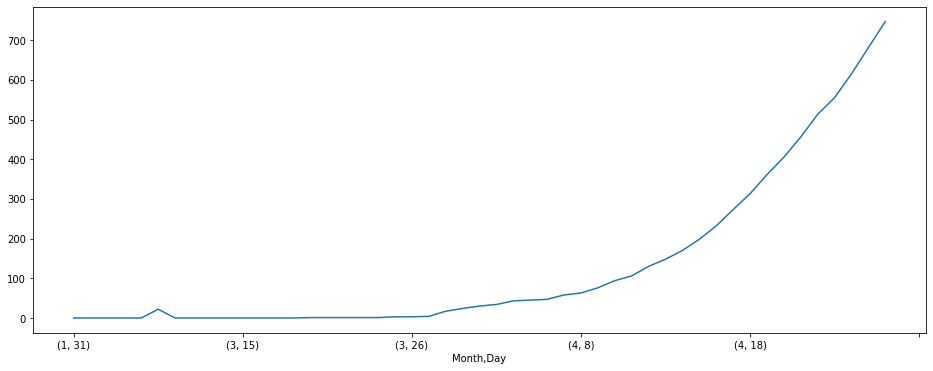

In [44]:
plt.figure(figsize=(16,6))
rus_data.groupby(['Month', 'Day']).sum()['Deaths'].plot();

Видно, что количество смертей с января растёт экспоненциально.

### Поэтому берегите себя и делайте прививки!